## Try to understand bathymetry grid cells of Fraser River inside NEMO

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools

In [2]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea.nc', 'r')

In [3]:
nc_tools.show_variables(bathy)

[u'nav_lon', u'nav_lat', u'Bathymetry']


In [4]:
bathyy = bathy.variables['Bathymetry'][:]
print bathyy[414, 334]

4.0


   # Creat bathy_meter_SalishSea3.nc as fixed and extended file

In [5]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea.nc \
bathy_meter_SalishSea3.nc
bathy_3 = nc.Dataset('bathy_meter_SalishSea3.nc','r+' )
bathyy_3 = bathy_3.variables['Bathymetry']
lon_3 = bathy_3.variables['nav_lon']
lat_3 = bathy_3.variables['nav_lat']
#new_bathyy_3 = np.asscalar(bathyy_3[:])

#type(new_bathyy_3[415,334])
nc_tools.show_variable_attrs(bathy_3, 'Bathymetry')
new_bathyy_3 = bathyy_3[:, :]
new_bathyy_3.shape
type(bathyy_3[431,291].item())
bathyy_3[431,291]

<type 'netCDF4.Variable'>
float64 Bathymetry(y, x)
    _FillValue: 0.0
    least_significant_digit: 1
    units: m
    valid_range: [   0.  428.]
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (898, 398)
filling on


100.0

In [6]:
# near the mouth area
bathyy_3[ 431, 291] = 86 + 3.095    
bathyy_3[ 430, 291] = 65.5 + 3.095
bathyy_3[ 429, 291] = 45.5 + 3.095
bathyy_3[ 428, 291] = 25.4 + 3.095
bathyy_3[ 427, 291] = 8 + 3.095

bathyy_3[ 426, 291] = 2 + 3.095
bathyy_3[ 425, 291] = 1 + 3.095

bathyy_3[ 431, 292] = 77 + 3.095
bathyy_3[ 430, 292] = 50 + 3.095
bathyy_3[ 429, 292] = 20 + 3.095
bathyy_3[ 428, 292] = 10 + 3.095
bathyy_3[ 427, 292] = 6 + 3.095
bathyy_3[ 426, 292] = 2 + 3.095

bathyy_3[ 431, 293] = 30 + 3.095
bathyy_3[ 430, 293] = 20 + 3.095
bathyy_3[ 429, 293] = 12 + 3.095
bathyy_3[ 428, 293] = 5  + 3.095
bathyy_3[ 427, 293] = 8 + 3.095

bathyy_3[ 430, 294] = 12 + 3.095
# in the river channel
bathyy_3[ 427, 294] = 9 + 3.095
bathyy_3[ 427, 295] = 9 + 3.095
bathyy_3[ 427, 296] = 8 + 3.095
bathyy_3[ 427, 297] = 7 + 3.095
bathyy_3[ 427, 298] = 8 + 3.095
bathyy_3[ 427, 299] = 8 + 3.095
bathyy_3[ 427, 300] = 8 + 3.095
bathyy_3[ 427, 301] = 7 + 3.095
bathyy_3[ 427, 302] = 7 + 3.095
bathyy_3[ 427, 303] = 5 + 3.095
## 
bathyy_3[ 428, 303] = 10 + 3.095
bathyy_3[ 428, 304] = 10 + 3.095
bathyy_3[ 428, 305] = 13 + 3.095
bathyy_3[ 428, 306] = 10 + 3.095
bathyy_3[ 427, 306] = 4 + 3.095
bathyy_3[ 427, 307] = 8 + 3.095
bathyy_3[ 426, 307] = 5 + 3.095
bathyy_3[ 426, 308] = 8 + 3.095

bathyy_3[ 425, 308] = 7 + 3.095
bathyy_3[ 425, 309] = 8 + 3.095
bathyy_3[ 424, 309] = 6 + 3.095
bathyy_3[ 424, 310] = 8 + 3.095
bathyy_3[ 423, 310] = 8 + 3.095
bathyy_3[ 423, 311] = 7 + 3.095
bathyy_3[ 422, 311] = 8 + 3.095
bathyy_3[ 422, 312] = 6 + 3.095
bathyy_3[ 421, 312] = 10 + 3.095
bathyy_3[ 421, 311] = 6 + 3.095
bathyy_3[ 420, 312] = 5 + 3.095
bathyy_3[ 420, 313] = 10 + 3.095
bathyy_3[ 419, 313] = 5 + 3.095 ##quite unsure
bathyy_3[ 419, 314] = 9 + 3.095
bathyy_3[ 419, 315] = 5 + 3.095
bathyy_3[ 418, 315] = 10 + 3.095
bathyy_3[ 418, 316] = 6 + 3.095




# prolong river channel
bathyy_3[ 416, 335] = 10 + 3.095
bathyy_3[ 416, 336] = 10 + 3.095
bathyy_3[ 416, 337] = 10 + 3.095
bathyy_3[ 416, 338] = 10 + 3.095
bathyy_3[ 416, 339] = 10 + 3.095


In [7]:
bathyy_3[416, 336]

13.125

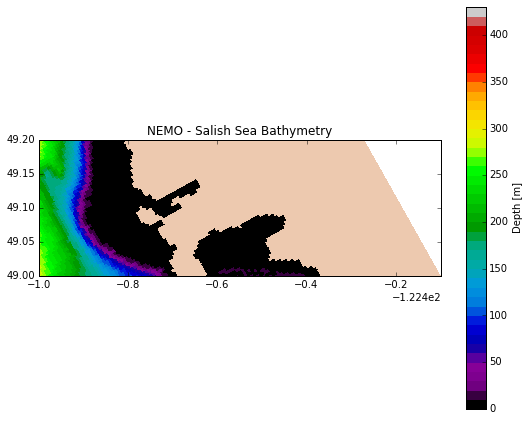

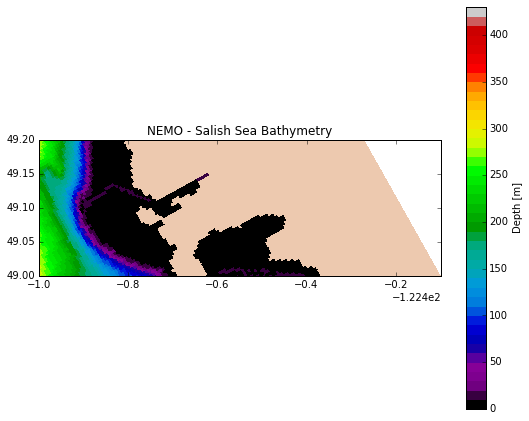

In [11]:
#plt.subplot(1, 2, 1)
figg = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.4, -122.5, 49., 49.2), 
colour_map='spectral', bins=50)
#plt.subplot(1, 2, 2)
figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.4, -122.5, 49., 49.2), 
colour_map='spectral', bins=50)

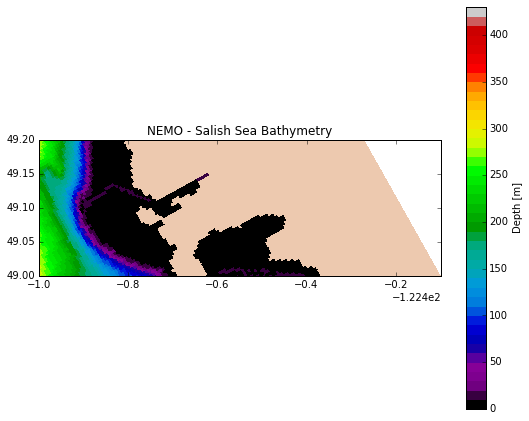

In [9]:
figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.4, -122.5, 49., 49.2), 
colour_map='spectral', bins=50)

<matplotlib.colorbar.Colorbar instance at 0x7f32f6730998>

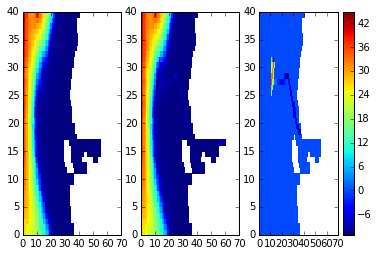

In [13]:
plt.subplot(1, 3, 1)
plt.pcolormesh(bathyy[400:440, 280:350])
plt.subplot(1, 3, 2)
plt.pcolormesh(bathyy_3[400:440, 280:350])
plt.subplot(1, 3, 3)
plt.pcolormesh(bathyy[400:440, 280:350] - bathyy_3[400:440, 280:350], cmap=plt.cm.jet)
plt.colorbar()

In [11]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')

In [12]:
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]
lon = bathy.variables['nav_lon']
lat = bathy.variables['nav_lat']

# Create bathy_meter_SalishSea4.nc only added with mean sea level

In [13]:
import numpy.ma as ma

In [14]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc \
bathy_meter_SalishSea4.nc
bathy_4 = nc.Dataset('bathy_meter_SalishSea4.nc','r+')
bathyy_4 = bathy_4.variables['Bathymetry']

In [15]:
bathyy_4[414,334]

4.0

In [16]:
#bathyy_4 = np.ma.zeros((898,398), dtype = float)
bathyy_4[:] = bathyy_4[:] + 3.095
#bathyy_5 = ma.masked_where(, bathyy_4)

In [22]:
bathyy_4 = bathy_4.variables['Bathymetry']

In [23]:
bathyy_4[414,334]

7.125

## Show center grid and corner grid

-122.939880371
49.1619377136
-56.3928222656
9.71626281738
2.405


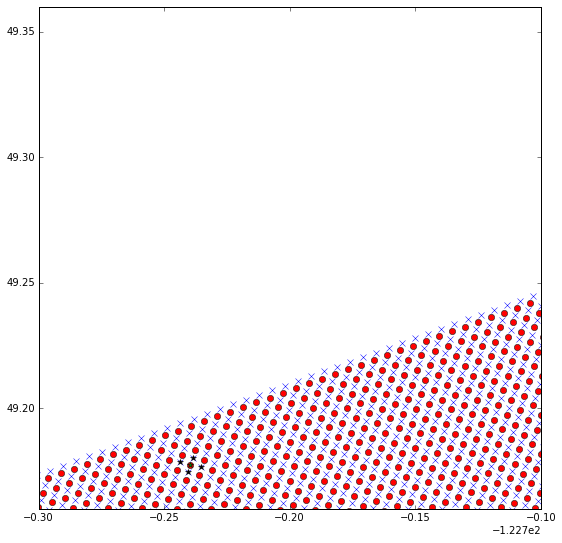

In [245]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
#plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[416,354], lat_f[416,354], '*k')
plt.plot(lon_f[416,355], lat_f[416,355], '*k')
plt.plot(lon_f[415,354], lat_f[415,354], '*k')
plt.plot(lon_f[415,355], lat_f[415,355], '*k')
plt.plot(lon[416,355], lat[416,355], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[419,313], lat[419,313], '*g')
plt.xlim((-123., -122.8))
plt.ylim(( 49.16, 49.36))
#print (sqrt((lon_f[416, 341] - lon_f[416, 340])^2 + (lat_f[416, 341] - lat_f[416, 340])^2)
print (lon[413, 353])
print (lat[413, 353])
print (lon[413, 353] + 122) * 60
print (lat[413, 353] -49) *60
print (10.26 - 10) *9.25

-122.938664796
49.1803698307
-56.1179688307
10.5869464138
2.405


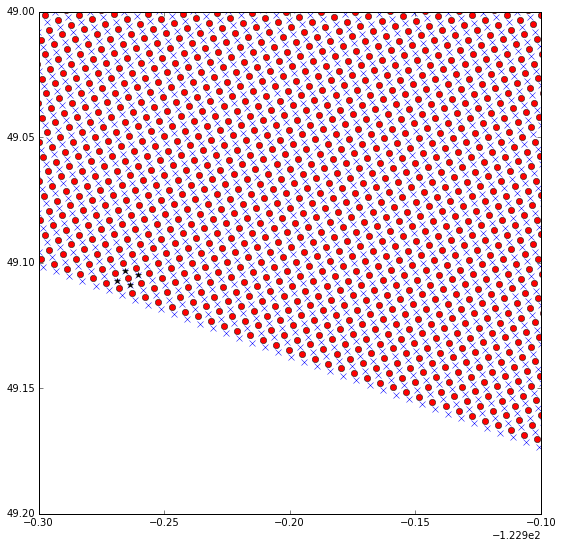

In [134]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
#plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[417,312], lat_f[417,312], '*k')
plt.plot(lon_f[418,312], lat_f[418,312], '*k')
plt.plot(lon_f[417,313], lat_f[417,313], '*k')
plt.plot(lon_f[418,313], lat_f[418,313], '*k')
#plt.plot(lon[416,341], lat[416,341], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[418,314], lat[418,314], '*g')
#plt.plot(lon[419,313], lat[419,313], '*g')
plt.xlim((-123.2, -123.))
plt.ylim(( 49.2, 49.))
#print (sqrt((lon_f[416, 341] - lon_f[416, 340])^2 + (lat_f[416, 341] - lat_f[416, 340])^2)
print (lon_f[416, 355])
print (lat_f[416, 355])
print (lon_f[415, 355] + 122) * 60
print (lat_f[415, 355] -49) *60
print (10.26 - 10) *9.25

(898, 398)
48.8562278748


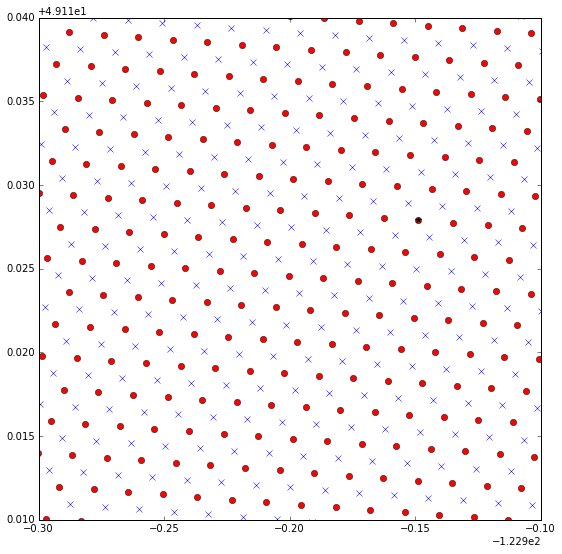

In [21]:
imin = 380; imax=480; jmin = 260; jmax = 398
plt.figure(figsize=(9,9))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
plt.plot(lon[416, 334], lat[416, 334], '*k')
plt.plot(lon_f[417, 312], lat_f[417, 312], '*g')
plt.xlim((-123.2, -123.))
plt.ylim((49.12, 49.15))
print lon.shape
print lat[380, 260]